<a href="https://colab.research.google.com/github/DarkWorldCoder/LearningAI/blob/master/TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train

--2024-01-23 17:10:21--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447555 (437K) [text/plain]
Saving to: ‘sentiment_train’

sentiment_train     100%[===================>] 437.07K  --.-KB/s    in 0.1s    

2024-01-23 17:10:22 (3.22 MB/s) - ‘sentiment_train’ saved [447555/447555]



In [2]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("sentiment_train",delimiter="\t")
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sentiment']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sentiment'}, axis=1)
              .sort_values('sentiment', ascending=True))
  xs = counted['sentiment']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('sentiment', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sentiment')
_ = plt.ylabel('count()')

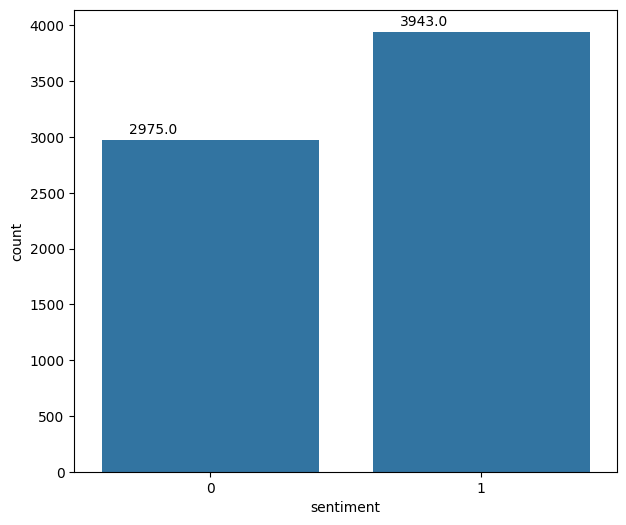

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,6))

ax = sns.countplot(x="sentiment",data=train_df)

for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+50))


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
feature_vector = cv.fit(train_df["text"])

features = cv.get_feature_names_out()

print(features)

['00' '007' '10' ... 'zach' 'zen' 'µª']


In [5]:
train_df_features = cv.transform(train_df["text"])

In [7]:
train_df_features.getnnz()

65398

In [8]:
train_df2 = pd.DataFrame(train_df_features.todense(),columns=features)

In [9]:
train_df2.iloc[0:2,150:150]

""
0
1


In [10]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as my_stop_words

In [11]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [15]:
my_stop_words = list(my_stop_words.union(["harry","potter","code","vinci","mountian","movie"]))
my_stop_words

['interest',
 'co',
 'anyhow',
 'in',
 'none',
 'himself',
 'both',
 'seem',
 'sincere',
 'those',
 'un',
 'meanwhile',
 'potter',
 'so',
 'therein',
 'due',
 'perhaps',
 'would',
 'de',
 'ie',
 'hundred',
 'all',
 'once',
 'first',
 'nothing',
 'yourself',
 'anywhere',
 'who',
 'wherein',
 'nobody',
 'mountian',
 'except',
 'wherever',
 'she',
 'by',
 'for',
 'no',
 'keep',
 'often',
 'be',
 'throughout',
 'another',
 'others',
 'thru',
 'while',
 'our',
 'less',
 'alone',
 'ours',
 'above',
 'before',
 'enough',
 'now',
 'fifty',
 'thus',
 'between',
 'neither',
 'find',
 'via',
 'otherwise',
 'fifteen',
 'after',
 'side',
 'upon',
 'only',
 'five',
 'next',
 'which',
 'nowhere',
 'code',
 'behind',
 'still',
 'sixty',
 'hence',
 'this',
 'mostly',
 'some',
 'something',
 'also',
 'through',
 'though',
 'an',
 'been',
 'empty',
 'a',
 'hereafter',
 'should',
 'go',
 'formerly',
 'fire',
 'what',
 'whose',
 'serious',
 'whereupon',
 'must',
 'ever',
 'ourselves',
 'each',
 'there',
 '

In [17]:
cv = CountVectorizer(max_features=10000,stop_words=my_stop_words)
feature_vector = cv.fit(train_df["text"])
features = cv.get_feature_names_out()

train_df_features = cv.transform(train_df["text"])
feature_counts = np.sum(train_df_features.toarray(),axis=0)
feature_count_df = pd.DataFrame(dict(features=features,counts=feature_counts))

feature_count_df.sort_values("counts",ascending=False).head(10)

,features,counts
398,da,2001
1165,mountain,2000
223,brokeback,2000
1072,love,1624
126,awesome,1127
1148,mission,1094
890,impossible,1093
1033,like,974
1642,sucks,602
1640,sucked,600


In [18]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stem_words(doc):
  stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
  non_stop = [word for word in list(set(stemmed_words) - set(my_stop_words))]
  return non_stop

In [19]:
cv = CountVectorizer(max_features=1000,analyzer=stem_words)
feature_vector = cv.fit(train_df["text"])
features = cv.get_feature_names_out()

train_df_features = cv.transform(train_df["text"])

feature_counts = np.sum(train_df_features.toarray(),axis=0)
feature_count_df = pd.DataFrame(dict(features=features,counts=feature_counts))

feature_count_df.sort_values("counts",ascending=False).head(10)

,features,counts
143,da,1982
80,brokeback,1930
439,mountain,1930
298,harri,1916
408,love,1837
802,suck,1378
922,wa,1142
43,awesom,1116
434,mission,1090
346,imposs,1090


In [20]:
train_df3 = pd.DataFrame(train_df_features.todense(),columns=features)
train_df3["sentiment"] = train_df["sentiment"]


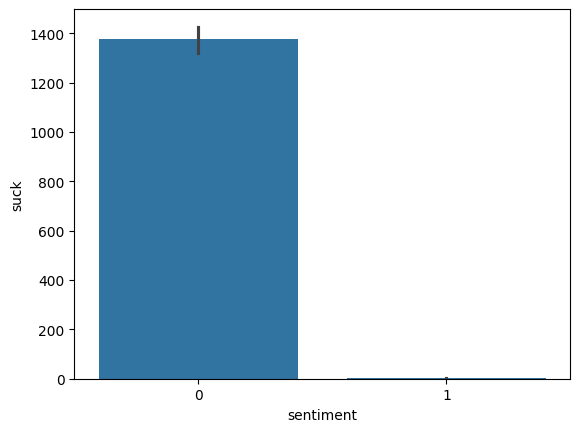

In [21]:
sns.barplot(x="sentiment",y="suck",data=train_df3,estimator=sum)
plt.show()

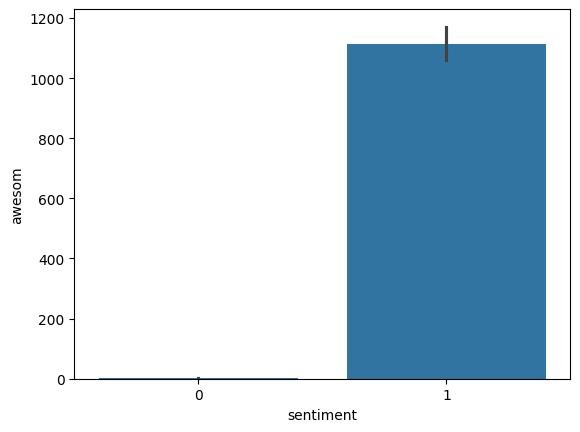

In [23]:
sns.barplot(x="sentiment",y="awesom",data=train_df3,estimator=sum)
plt.show()

In [26]:
cv = CountVectorizer(max_features=1000)

feature_vector - cv.fit(train_df["text"])

features = cv.get_feature_names_out()
train_df_features = cv.transform(train_df["text"])
feature_counts = np.sum(train_df_features.toarray(),axis=0)
featute_count_df = pd.DataFrame(dict(features=features,counts=feature_counts))

feature_count_df.sort_values("counts",ascending=False).head(10)

TypeError: unsupported operand type(s) for -: 'CountVectorizer' and 'CountVectorizer'